<a href="https://colab.research.google.com/github/yeesem/Advanced-Tensorflow-Specialization/blob/main/Transfer_Learning_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [3]:
import os,re,time,json
import PIL.Image,PIL.ImageFont,PIL.ImageDraw
import numpy as np

import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50
from matplotlib import pyplot as plt
import tensorflow_datasets as tfds

print("Tensorflow version ",tf.__version__)

Tensorflow version  2.15.0


# Parameters


*   Define the batch size
*   Define the class(category) names



In [4]:
BATCH_SIZE = 32
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Visualization Utilities

In [7]:
plt.rc('image',cmap = 'gray')
plt.rc('grid',linewidth = 0)
plt.rc('xtick',top=False,bottom = False,labelsize = 'large')
plt.rc('ytick',left = False,right = False,labelsize = 'large')
plt.rc('axes',facecolor = 'F8F8F8',titlesize = 'large',edgecolor = 'white')
plt.rc('text', color='a8151a')
plt.rc('figure', facecolor='F0F0F0')
MATPLOTLIB_FONT_DIR = os.path.join(os.path.dirname(plt.__file__), "mpl-data/fonts/ttf")

def display_images(digits,predictions,labels,title):
  n = 10

  indexes = np.random.choice(len(predictions),size = n)
  n_digits = digits[indexes]
  n_predictions = predictions[indexes]
  n_predictions = n_predictions.reshape((n,))
  n_labels = labels[indexes]

  fig = plt.figure(figsize = (20,4))
  plt.title(title)
  plt.yticks([])
  plt.xticks([])

  for i in range(10):
    ax = fig.add_subplot(1,10,i+1)
    class_index = n_predictions[i]

    plt.xlabel(classes[class_index])
    plt.xticks([])
    plt.yticks([])
    plt.imshow(n_digits[i])

def plot_metrics(metric_name,title,ylim = 5):
  plt.title(title)
  plt.ylim(o,ylim)
  plt.plot(history.history[metric_name],color = 'blue',label = metric_name)
  plt.plot(history.history["val_" + metric_name],color = 'blue',label = "val_" + metric_name)

# Loading and Preprocessing Data

In [8]:
(training_images, training_labels) , (validation_images, validation_labels) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


# Visualize Dataset

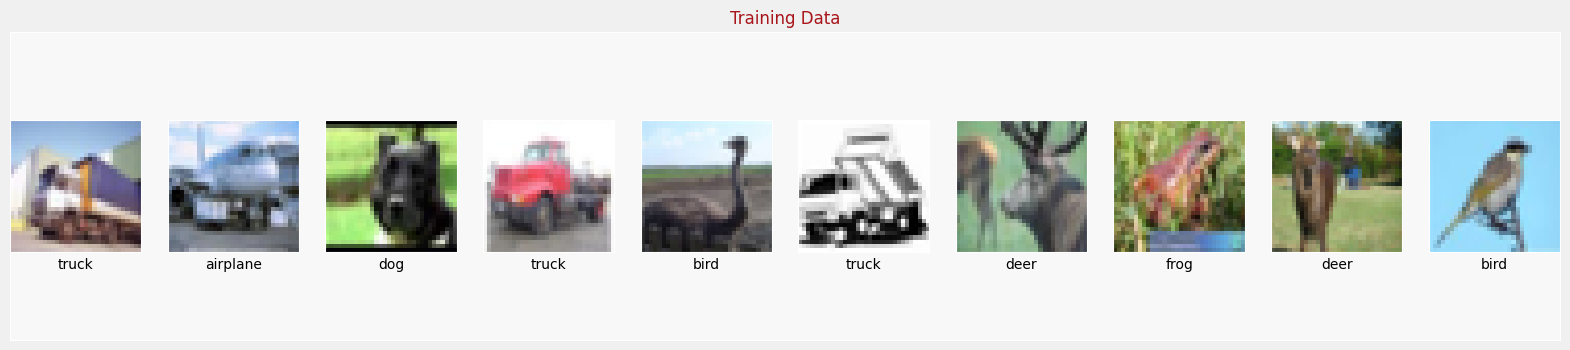

In [10]:
display_images(training_images,training_labels,training_labels,"Training Data")

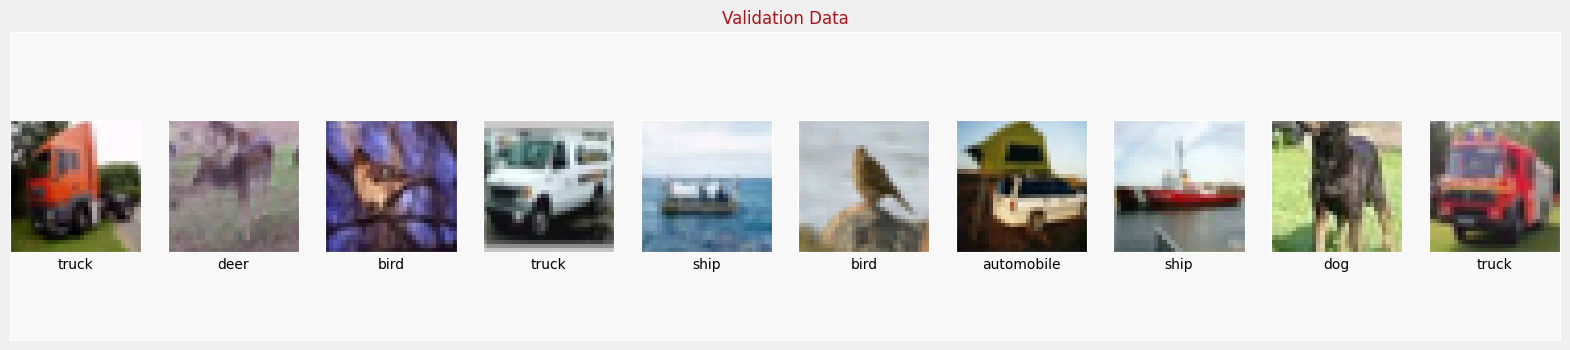

In [11]:
display_images(validation_images,validation_labels,validation_labels,"Validation Data")

In [12]:
validation_images[0].astype('float32').shape

(32, 32, 3)

# Preprocess Dataset